In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

results_mediapipe = pd.read_csv("results.csv", sep=";")
results_smoothing = pd.read_csv("results_smoothing.csv", sep=";")

results_mediapipe, results_smoothing

(         method  avg_spk_wer
 0      baseline        0.530
 1  MediaPipe_V0        0.601
 2  MediaPipe_V1        0.729
 3  MediaPipe_V2        0.645
 4  MediaPipe_V3        0.667
 5  MediaPipe_V4        0.607
 6  MediaPipe_V5        0.755
 7  MediaPipe_V6        0.637
 8  MediaPipe_V7        0.610,
                       method  avg_spk_wer
 0                   baseline        0.530
 1       baseline_with_savgol        0.615
 2   baseline_with_moving_avg        0.591
 3     baseline_with_gaussian        0.689
 4                  mediapipe        0.601
 5      mediapipe_with_savgol        0.680
 6  mediapipe_with_moving_avg        0.663
 7    mediapipe_with_gaussian        0.717)

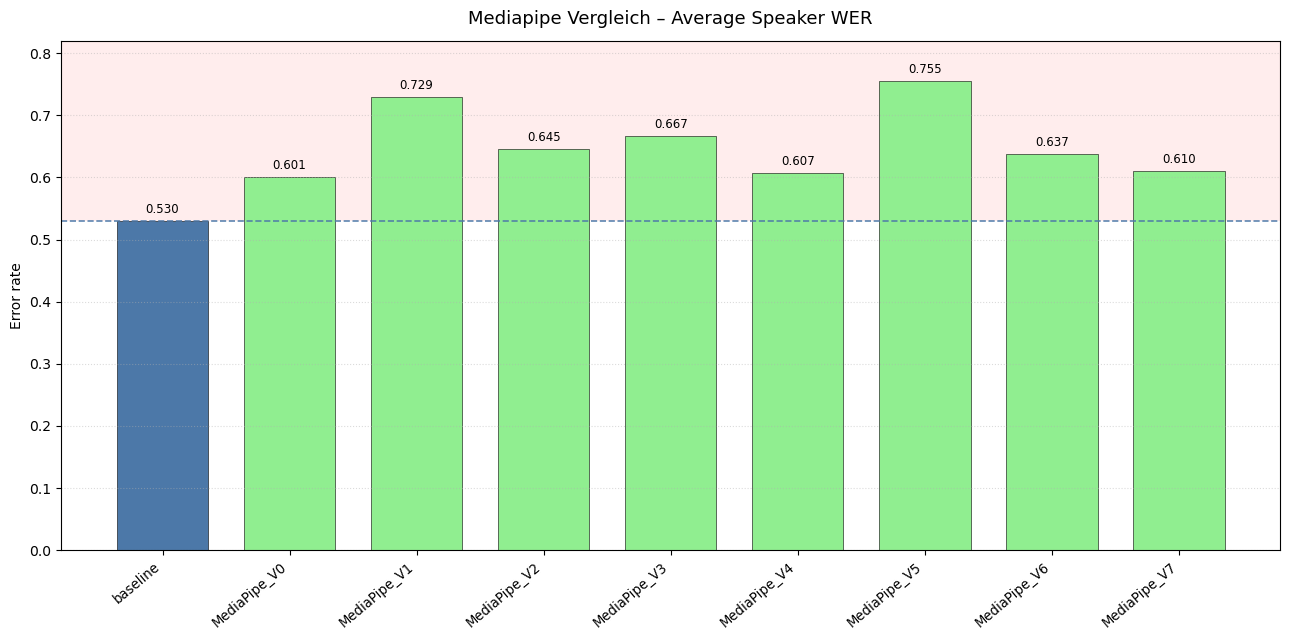

In [8]:
methods = results_mediapipe.method.to_list()

avg_spk_WER = results_mediapipe.avg_spk_wer.to_list()

fig, ax = plt.subplots(figsize=(13, 6.5))

x = np.arange(len(methods))
width = 0.72

# Farben: Baseline anders
colors = ['#4c78a8' if i == 0 else 'lightgreen' for i in range(len(methods))]

bars = ax.bar(x, avg_spk_WER, width, color=colors, edgecolor='black', linewidth=0.4)

ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=40, ha='right', fontsize=9.5)

baseline_value = avg_spk_WER[0]
ax.axhline(y=baseline_value, color='#4c78a8', linestyle='--', linewidth=1.2, alpha=0.9)
ax.axhspan(ymin=baseline_value, ymax=1.0, facecolor='red', alpha=0.07, zorder=0)

# Werte-Labels
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.008, f'{h:.3f}',
            ha='center', va='bottom', fontsize=8.5)

ax.set_ylim(0, 0.82)
ax.grid(axis='y', linestyle=':', alpha=0.45)
ax.set_title("Mediapipe Vergleich – Average Speaker WER", fontsize=13, pad=12)
ax.set_ylabel("Error rate")

plt.tight_layout()
plt.show()

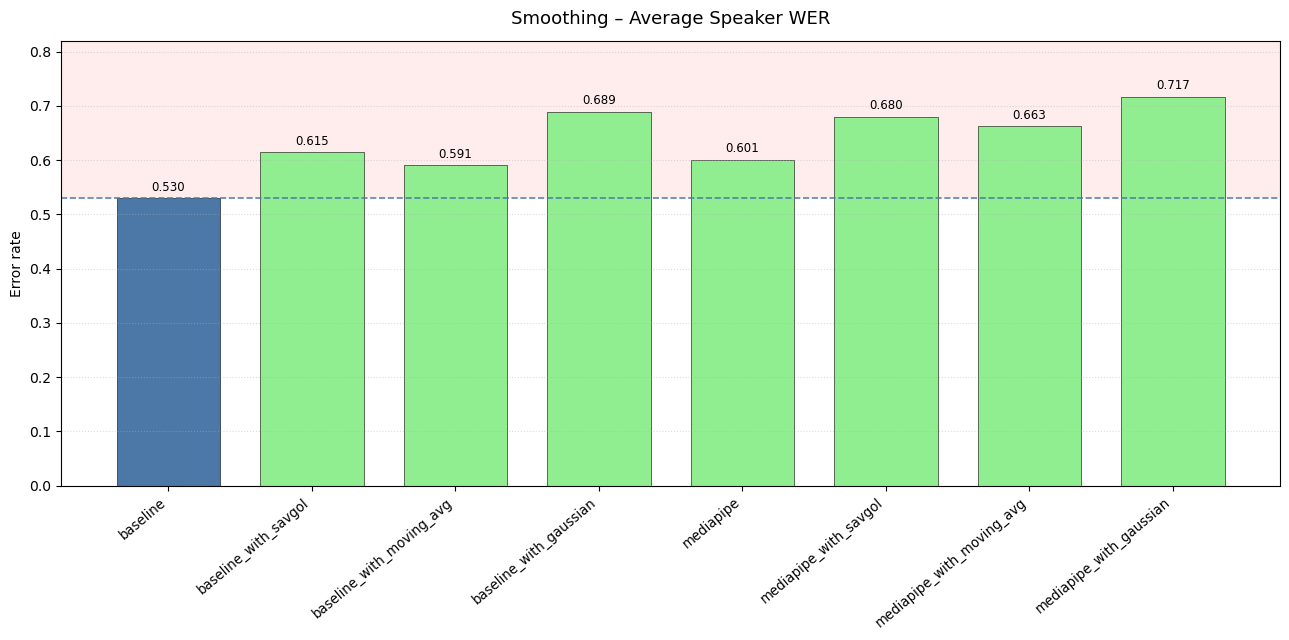

In [9]:
methods = results_smoothing.method.to_list()
avg_spk_WER = results_smoothing.avg_spk_wer.to_list()

fig, ax = plt.subplots(figsize=(13, 6.5))

x = np.arange(len(methods))
width = 0.72

# Farben: Baseline anders
colors = ['#4c78a8' if i == 0 else 'lightgreen' for i in range(len(methods))]

bars = ax.bar(x, avg_spk_WER, width, color=colors, edgecolor='black', linewidth=0.4)

ax.set_xticks(x)
ax.set_xticklabels(methods, rotation=40, ha='right', fontsize=9.5)

baseline_value = avg_spk_WER[0]
ax.axhline(y=baseline_value, color='#4c78a8', linestyle='--', linewidth=1.2, alpha=0.9)
ax.axhspan(ymin=baseline_value, ymax=1.0, facecolor='red', alpha=0.07, zorder=0)

# Werte-Labels
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.008, f'{h:.3f}',
            ha='center', va='bottom', fontsize=8.5)

ax.set_ylim(0, 0.82)
ax.grid(axis='y', linestyle=':', alpha=0.45)
ax.set_title("Smoothing – Average Speaker WER", fontsize=13, pad=12)
ax.set_ylabel("Error rate")

plt.tight_layout()
plt.show()